In [ ]:
import pandas as pd
import json
import csv

# Данные


In [ ]:
data_list = []
com = []

csvfile = open('/content/sample_data/dataset.csv', "r")
f = csv.reader(csvfile, delimiter='|')
p = {}
for i in f:
  if i[1].isdigit():
    data = {
                  'Rating': i[1],
                  'Text': i[0],
                 }
    if data not in data_list:
      data_list.append(data)
      com.append(len(i[0]))

df = pd.DataFrame(sorted(data_list[1:], key=lambda x: int(x["Rating"])))

df

,Rating,Text
0,1,Ничего из заявленного не соответствует тому ч...
1,1,"Хороший отель, останавливаюсь , вернее остана..."
2,1,Очень не приятно когда у сотрудников отеля на...
3,1,"Диван был грязный, сантехника толком не работ..."
4,1,"необоснованные штрафы с гостей, распространен..."
...,...,...
37762,10,"Отель со свежим ремонтом. Все чисто, красиво...."
37763,10,"персонал, место, завтраки, чистота ничего"
37764,10,Останавливаюсь уже не первый год. Отличный от...
37765,10,"персонал, район, сервис"


# Обработка данных и разведочный анализ

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Загрузка стоп-слов и инициализация лемматизатора
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('russian'))
lemmatizer = WordNetLemmatizer()

# Функция для предобработки текста
def preprocess_text(text):
    # Приведение текста к нижнему регистру
    text = text.lower()

    # Удаление ссылок и спецсимволов
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)

    # Удаление чисел и пунктуации
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация текста
    words = word_tokenize(text)

    # Удаление стоп-слов и лемматизация
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return " ".join(words)

# Пример использования
df['cleaned_review'] = df['Text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


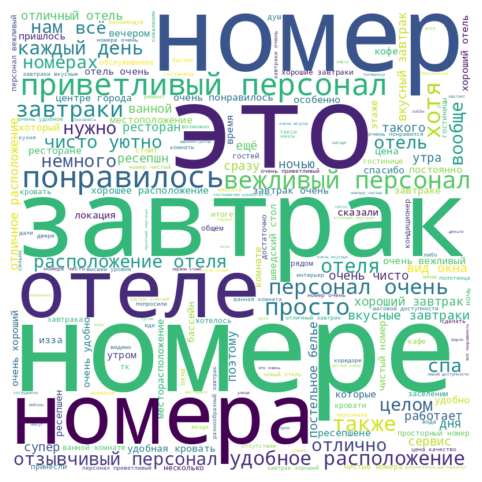

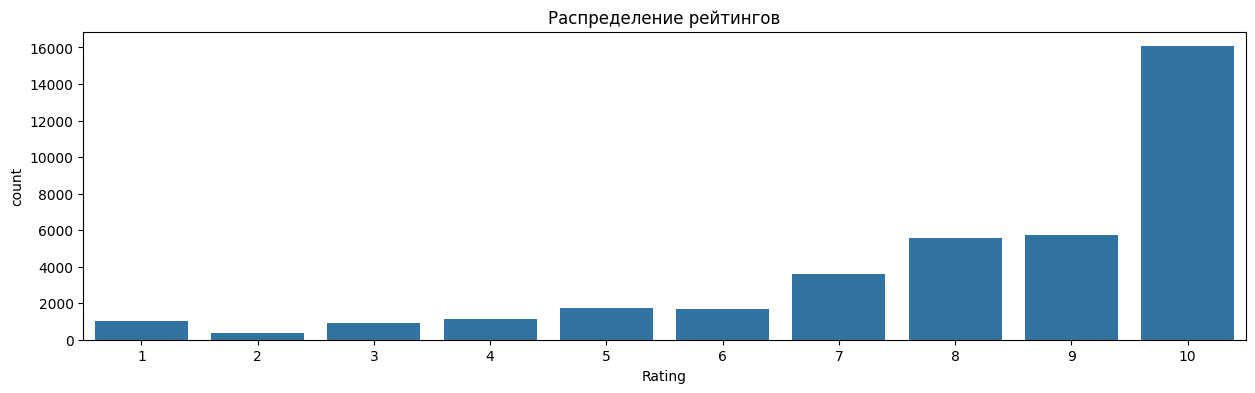

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Облако слов для визуализации частотности слов
wordcloud = WordCloud(width=800, height=800, background_color ='white').generate(' '.join(df['cleaned_review']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Анализ распределения рейтингов
plt.figure(figsize=(15, 4))
sns.countplot(x='Rating', data=df)
plt.title('Распределение рейтингов')
plt.show()

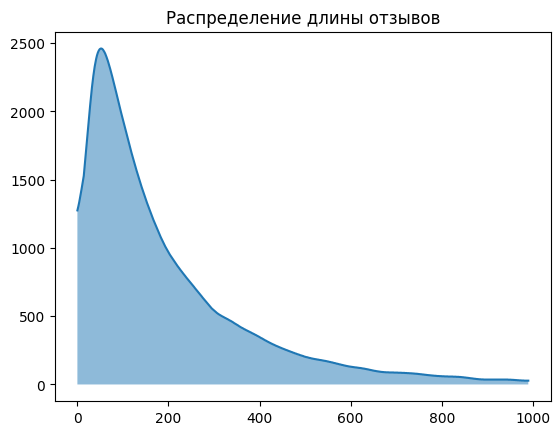

In [ ]:
# Анализ длины отзывов
def normaliz(spism, rast=1):
    normal = []

    for i in range(len(spism)):
        start = max(0, i - rast)
        end = min(len(spism) - 1, i + rast)
        new = sum(spism[start:end]) // (end - start)

        normal.append(new)

    return normal


def alis(slv, rating=0.1):
    d1 = sorted([x for x in slv.keys()])

    normal = [0]
    uks = d1[0]

    for i in range(1, d1[-1] + 1):
        if d1[uks] < i and uks + 2 < len(d1):
            uks += 1

        razx = normal[i - 1] - (normal[i - 1] + slv[d1[uks]] + slv[d1[uks + 1]]) // 3
        new = normal[i - 1] - razx * rating

        normal.append(new)

    return [x for x in range(d1[-1] + 1)], normal


def diogramma(spis_len):
    import matplotlib.pyplot as plt

    spis_len = com

    sred = sum(spis_len) // len(spis_len)
    sred_kor = 1000
    spis_len = [x for x in spis_len if x < sred_kor]

    slv = {}

    for i in spis_len:
        n = 15
        ind = (i // n) * n
        slv[ind] = slv.get(ind, 0) + 1

    slv[0] = 0

    y = sorted(slv.keys())
    x = [slv[i] for i in y]

    y, x = alis(slv, rating=0.1)

    for i in range(3):
        x = normaliz(x, rast=14)

    plt.plot(y, x)
    plt.fill_between(y, x, alpha=0.5)
    plt.title('Распределение длины отзывов')
    plt.show()


diogramma(com)